## Simple Linear Regression Using Pytorch
### Simulating Training Data

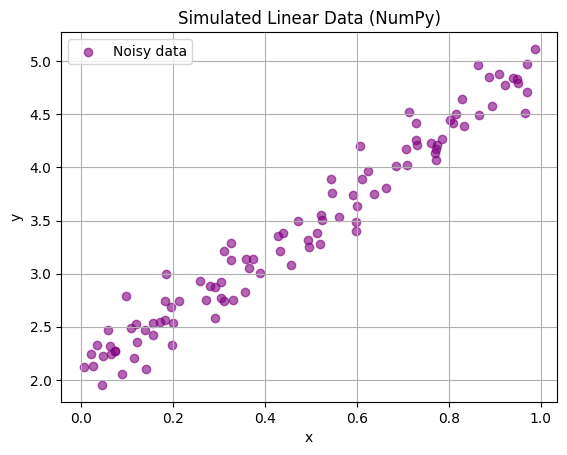

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate 100 random x values
X_np = np.random.rand(100, 1)

# True parameters
true_w = 3.0
true_b = 2.0

# Add noise
noise = np.random.randn(100, 1) * 0.2

# Generate y values
y_np = true_w * X_np + true_b + noise

# Scatter plot
plt.scatter(X_np, y_np, color='purple', alpha=0.6, label='Noisy data')
plt.title("Simulated Linear Data (NumPy)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## PyTorch Implementation

In [3]:
import torch
import torch.nn as nn

# Convert NumPy arrays to PyTorch tensors (float32 by default is best)
X = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np).float()

# Define model: 1 input → 1 output
model = nn.Linear(in_features=1, out_features=1)

# Mean Squared Error loss
loss_fn = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [4]:
n_epochs = 200

for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = loss_fn(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 9.9763
Epoch 20: Loss = 0.3870
Epoch 40: Loss = 0.2328
Epoch 60: Loss = 0.1456
Epoch 80: Loss = 0.0964
Epoch 100: Loss = 0.0685
Epoch 120: Loss = 0.0528
Epoch 140: Loss = 0.0438
Epoch 160: Loss = 0.0388
Epoch 180: Loss = 0.0360


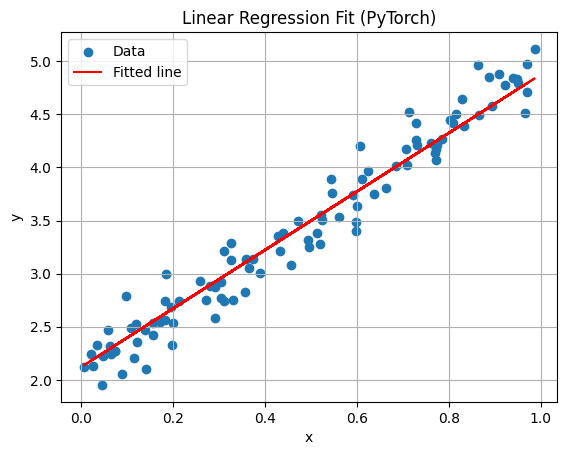

In [5]:
# After training, get predicted values
with torch.no_grad():
    y_pred = model(X)

# Plot original data and fitted line
plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.plot(X.numpy(), y_pred.numpy(), color='red', label='Fitted line')
plt.title("Linear Regression Fit (PyTorch)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
w_learned = model.weight.item()
b_learned = model.bias.item()
print(f"Learned weight: {w_learned:.4f}, Learned bias: {b_learned:.4f}")

Learned weight: 2.7546, Learned bias: 2.1207


## Multiple Linear Regression(Scikit Learn)

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Load dataset
data = fetch_california_housing()
X_np = data.data  # shape: (20640, 8)
y_np = data.target.reshape(-1, 1)  # shape: (20640, 1)

# Scale features (important for gradient descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_np, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_pred, y_test)
print('Score: ', score)
print(model.coef_)
print(model.intercept_)

Score:  0.3376701658930997
[[ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
  -0.89663505 -0.86892682]]
[2.06786231]


## Multiple Lin Regression(PyTorch)

In [8]:
#Convert to Tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [11]:
import torch.nn as nn

model = nn.Linear(in_features=8, out_features=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Training Loss = {loss.item():.4f}")


Epoch 0: Training Loss = 5.3722
Epoch 100: Training Loss = 1.6504
Epoch 200: Training Loss = 0.7281
Epoch 300: Training Loss = 0.5431
Epoch 400: Training Loss = 0.5199
Epoch 500: Training Loss = 0.5181
Epoch 600: Training Loss = 0.5179
Epoch 700: Training Loss = 0.5179
Epoch 800: Training Loss = 0.5179
Epoch 900: Training Loss = 0.5179


In [12]:
def r2_score_torch(y_true, y_pred):
    ss_total = ((y_true - y_true.mean()) ** 2).sum()
    ss_res = ((y_true - y_pred) ** 2).sum()
    r2 = 1 - ss_res / ss_total
    return r2.item()
    
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    score = r2_score_torch(y_test_pred, y_test_tensor)

print(f"R2 score: {score:.4f}")
print(model.weight.data)
print(model.bias.data)

R2 score: 0.3377
tensor([[ 0.8524,  0.1224, -0.3051,  0.3711, -0.0023, -0.0366, -0.8966, -0.8689]])
tensor([2.0679])
